In [11]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv("student_scores.csv")
df

,Hours,Scores,Pass
0,2.3,18,0
1,5.0,45,1
2,3.2,25,0
3,8.5,72,1
4,3.5,30,0
5,1.5,20,0
6,9.2,88,1
7,5.5,60,1
8,8.3,81,1
9,2.7,25,0


<IPython.core.display.Javascript object>


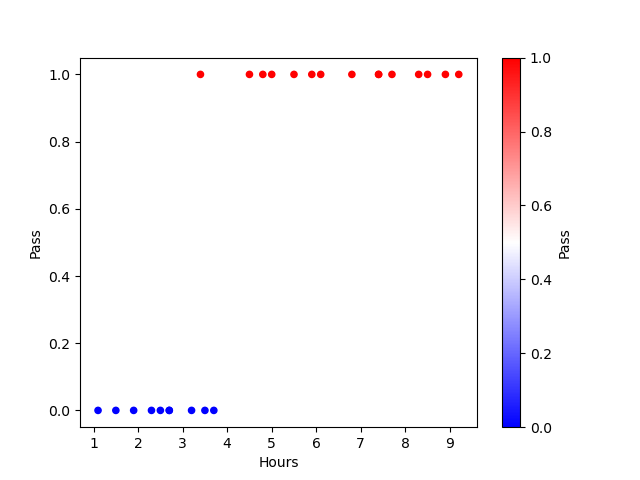

In [13]:
x = df["Hours"]           # x-axis ma Hours rakheko
y = df["Pass"]            # y-axis ma pass rakheko

df.plot.scatter(x="Hours",y="Pass",c="Pass",colormap='bwr')            # c='' vannale color ho i.e kun column ko value ko basis ma color halni vaneko(i.e ahile lai pass vanni column ko value ko basis ma color halni vaneko) #colormap='' vannale color combination # here, all the blue points indicate student tha have failed & all the red points indicate the students that have passed # using scatter plot so that i can see in scatter way  # yo talako plot ma blue dots indicate fail & red dots indicate pass # sigmoid curve ko red dots ko meaning vaneko chai.. for every blue dots(HOURS) the prediction(PASS or FAIL) is showing in the sigmoid curve

In [5]:
def sigmoid(z):                             # sigmoid equation definition part
    return 1 / (1+ np.exp(-z))              # yo line ko code chai sigmoid equation ho.. we are also using numpy exponential method(i.e np.exp() )

In [6]:
def logistic_regression(all_x,all_y,m,b):               # Definition of Logistic regression
    for x,y_actual in zip(all_x,all_y):
        y_pred = sigmoid(m*x+b)                         # sigmoid() method call gareko.. sigmoid method ma sigmoid equation define gareko cha # sigmoid method ma mx+b as argument pass gareko cha
        error = y_pred - y_actual                       # calculating the error
        
        delta_m = -1 * (error * x) * 0.05               # Note : depending on the learning rate you choose you will get different shapes of sigmoid curve so you must choose the fitting learning rate # opposite direction of delta m move garnu pareko le -1 le multiply gareko # yo line ko 0.05 chai auta small learning rate ho
        delta_b = -1 * (error) * 0.05                   # Note : depending on the learning rate you choose you will get different shapes of sigmoid curve so you must choose the fitting learning rate  # opposite direction of delta m move garnu pareko le -1 le multiply gareko # yo line ko 0.05 chai auta small learning rate ho
        
        # Adjusting value of m(slope) & b(y-intercept)
        m = m + delta_m
        b = b + delta_b
        
    return m,b                                          # returning value of slope & y-intercept  

In [7]:
# Initializing m & b with zero... 
m = 0
b = 0

for i in range(0,100):                           # sigmoid curve banni ki nabanni vanni kura no. of iteration ma pani depend huncha... (i.e yedi less no. of iterations diyo vani sigmoid curve banna tw banla but inaccurate banna sakcha)
    m,b = logistic_regression(x,y,m,b)            # logistic_regression() method call gareko
    
    
m,b                                             # These m & b are the parameter that our logistic_regression model learn 

(1.5493633083078429, -5.8807083566516765)

In [8]:
### Helper function use when needed
def get_sigmoid(X,m,b):
    sig = []                                     # sig vanni auta empty list create gareko
    for x in X.values:
        y = sigmoid(m*x + b)                     # sigmoid vanni method call gareko
        sig.append(y)                            # sigmoid equation le predict garera aayeko y_prediction value lai sig vanni list ma append gareko

    return sig                                   # returning the list

In [9]:
# plt.plot(x,y,'o')
plt.xlabel("Hours")
plt.ylabel("Score")

sig = get_sigmoid(x,m,b)                         # calling the get_sigmoid() method by passing argument as x,m & b

plt.plot(x,sig,'ro')                             # 'ro' vananle plotting with red color dots # plotting the plot for x & predicted value by sigmoid function

plt.show()

In [10]:
def predict(x,m,b):                # predict() garney auta method ho..
    y = sigmoid(m*x + b)
    
    if y > 0.5:                    # if the value of sigmoid is greater than 0.5 we are classifying it as pass
        return 1
    else:
        return 0                   # if the value of sigmoid is less than 0.5 we are classifying it as false

    
    
df["Predictions"] = df.apply(lambda row: predict(row["Hours"],m,b),axis=1)       # apply method is used to apply any simpler or lambda function # calliing predict() method .... Dataframe ma axis=1 vannale column wise vanne bujincha
df

,Hours,Scores,Pass,Predictions
0,2.3,18,0,0
1,5.0,45,1,1
2,3.2,25,0,0
3,8.5,72,1,1
4,3.5,30,0,0
5,1.5,20,0,0
6,9.2,88,1,1
7,5.5,60,1,1
8,8.3,81,1,1
9,2.7,25,0,0
